<h2 color='black'>5.6 专题：线性回归

<p>如果说朴素贝叶斯是解决分类任务的好起点，那么线性回归模型就是解决回归任务的好起点。这些模型之所以大受欢迎，是因为它们的拟合速度非常快，而且很容易解释。你可能对线性回归模型最简单的形式（即对数据拟合一条直线）已经很熟悉了，不过经过扩展，这些模型可以对更复杂的数据行为进行建模。</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h3>5.6.1  简单线性回归

<p>将数据拟合成一条直线。直线拟合的模型方程为 y = ax + b，其中 a 是直线斜率，b 是直线截距。</p>
<p>看看下面的数据，它们是从斜率为 2、截距为 -5 的直线中抽取的散点</p>

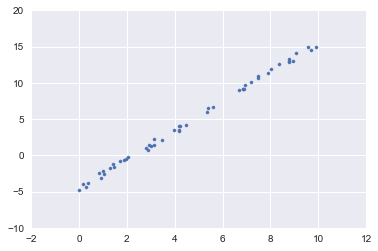

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.xlim(-2, 12)
plt.ylim(-10, 20)
plt.scatter(x, y, s=10);

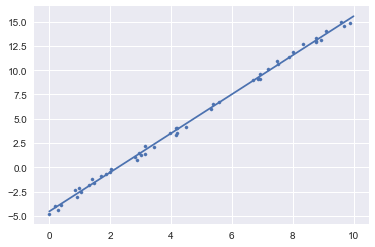

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit);

数据的斜率和截距都在模型的拟合参数中，Scikit-Learn 通常会在参数后面加一条下划线，
即 coef_ 和 intercept_ :

In [10]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.00823024322775
Model intercept: -4.5336529720991265


### 5.6.2　基函数回归

#### 1：多项式基函数

In [15]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [16]:
# 创建一个7次多项式回归模型
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

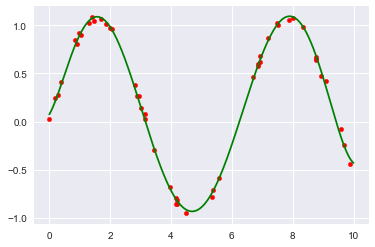

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.rand(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=20, color='r')
plt.plot(xfit, yfit, color='g');

#### 2：高斯基函数

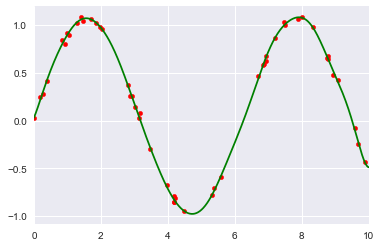

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """一维输入均匀分布的高斯特征"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        """# 在数据区间中创建N个高斯分布中心"""
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=20, color='r')
plt.plot(xfit, yfit, color='g')
plt.xlim(0,10);

#### 5.6.3：正则化

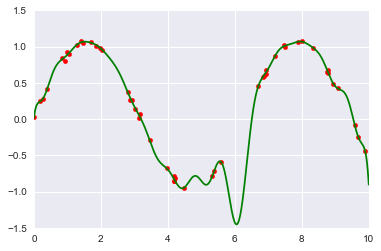

In [30]:
# 如果选择了太多高斯基函数，那么最终的拟合结果看起来可能并不好
# 很容易造成过拟合

model = make_pipeline(GaussianFeatures(30), 
                      LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y, color='r', s=20)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), color='g')
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

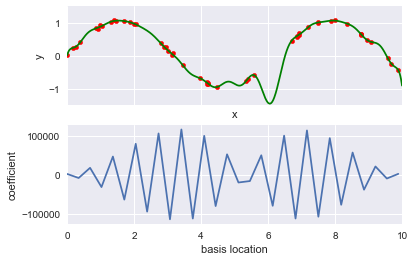

In [32]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y, color='r', s=20)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]), color='g')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

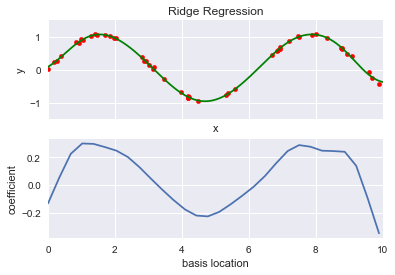

In [33]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

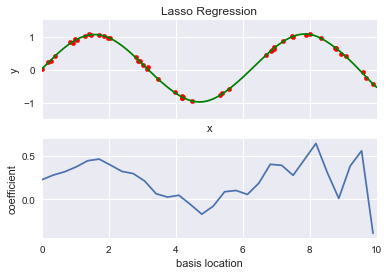

In [34]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.001))
basis_plot(model, title='Lasso Regression')